In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
df=pd.read_csv("DressData.csv")
df

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,Decoration,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,O-neck,Sleeveless,Empire,Silk,Ruffles,Animal,Yes
1,Casual,Low,3.9,L,Summer,O-neck,Petal,Natural,Microfiber,Ruffles,Animal,No
2,Vintage,High,4.9,L,Autumn,O-neck,Full,Natural,Polyster,NaN,Print,No
3,Brief,Average,4.6,L,Spring,O-neck,Full,Natural,Silk,Embroidary,Print,Yes
4,Cute,Low,4.5,M,Summer,O-neck,Butterfly,Natural,Chiffon,Bow,Dot,No
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Casual,Low,4.7,M,Spring,O-neck,Full,Natural,Polyster,NaN,Solid,Yes
496,Sexy,Low,4.3,Free,Summer,O-neck,Full,Empire,Cotton,NaN,Striped,No
497,Casual,Average,4.7,M,Summer,V-neck,Full,Empire,Cotton,Lace,Solid,Yes
498,Casual,Average,4.6,L,Winter,Boat-neck,Sleeveless,Empire,Silk,Applique,Print,Yes


In [34]:
df.isnull().sum()

Style               0
Price               0
Rating              0
Size                0
Season              0
NeckLine            0
SleeveLength        0
Waistline           0
Material            0
Decoration        238
Pattern Type        0
Recommendation      0
dtype: int64

In [35]:
df.shape

(500, 12)

In [36]:
df.isna().any()

Style             False
Price             False
Rating            False
Size              False
Season            False
NeckLine          False
SleeveLength      False
Waistline         False
Material          False
Decoration         True
Pattern Type      False
Recommendation    False
dtype: bool

In [37]:
(df.astype(str) == '?').any()

Style             False
Price             False
Rating             True
Size              False
Season            False
NeckLine           True
SleeveLength       True
Waistline          True
Material          False
Decoration        False
Pattern Type      False
Recommendation    False
dtype: bool

In [38]:
df=df.drop(['Rating','NeckLine','SleeveLength','Waistline','Material','Decoration'],axis=1)
df

,Style,Price,Size,Season,Pattern Type,Recommendation
0,Sexy,Low,M,Summer,Animal,Yes
1,Casual,Low,L,Summer,Animal,No
2,Vintage,High,L,Autumn,Print,No
3,Brief,Average,L,Spring,Print,Yes
4,Cute,Low,M,Summer,Dot,No
...,...,...,...,...,...,...
495,Casual,Low,M,Spring,Solid,Yes
496,Sexy,Low,Free,Summer,Striped,No
497,Casual,Average,M,Summer,Solid,Yes
498,Casual,Average,L,Winter,Print,Yes


In [39]:
(df.astype(str) == '?').any()
df

,Style,Price,Size,Season,Pattern Type,Recommendation
0,Sexy,Low,M,Summer,Animal,Yes
1,Casual,Low,L,Summer,Animal,No
2,Vintage,High,L,Autumn,Print,No
3,Brief,Average,L,Spring,Print,Yes
4,Cute,Low,M,Summer,Dot,No
...,...,...,...,...,...,...
495,Casual,Low,M,Spring,Solid,Yes
496,Sexy,Low,Free,Summer,Striped,No
497,Casual,Average,M,Summer,Solid,Yes
498,Casual,Average,L,Winter,Print,Yes


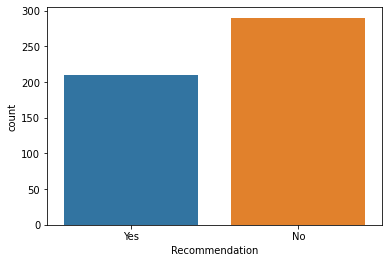

In [40]:
sns.countplot(df['Recommendation'],label='count')

In [41]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Style']=lb.fit_transform(df['Style'])
df['Price']=lb.fit_transform(df['Price'])
df['Size']=lb.fit_transform(df['Size'])

df['Season']=lb.fit_transform(df['Season'])

df['Pattern Type']=lb.fit_transform(df['Pattern Type'])

df['Recommendation']=lb.fit_transform(df['Recommendation'])
df

,Style,Price,Size,Season,Pattern Type,Recommendation
0,9,2,2,2,0,1
1,2,2,1,2,0,0
2,10,1,1,0,9,0
3,1,0,1,1,9,1
4,3,2,2,2,2,0
...,...,...,...,...,...,...
495,2,2,2,1,10,1
496,9,2,0,2,12,0
497,2,0,2,2,10,1
498,2,0,1,3,9,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001BF2998520>,
      dtype=object)

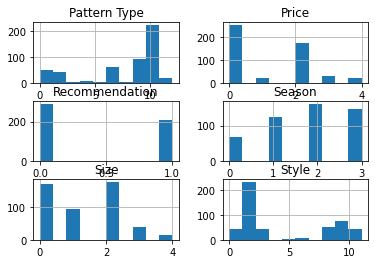

In [42]:
df.hist()

In [43]:
df.corr()

,Style,Price,Size,Season,Pattern Type,Recommendation
Style,1.000000,0.044484,0.024440,0.001565,-0.034160,0.025558
Price,0.044484,1.000000,-0.138375,0.043196,-0.008570,0.157638
Size,0.024440,-0.138375,1.000000,-0.024978,-0.065117,-0.037973
Season,0.001565,0.043196,-0.024978,1.000000,0.014540,-0.049519
Pattern Type,-0.034160,-0.008570,-0.065117,0.014540,1.000000,-0.117832
Recommendation,0.025558,0.157638,-0.037973,-0.049519,-0.117832,1.000000


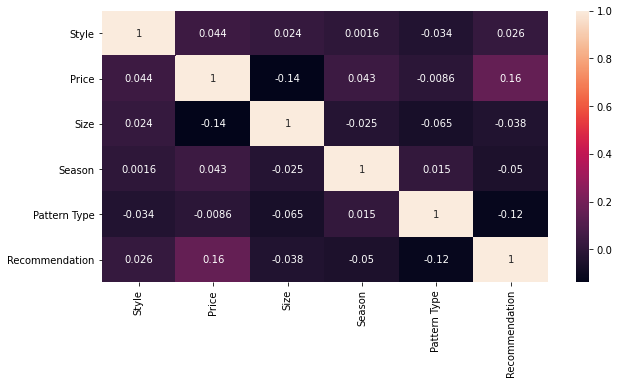

In [44]:
plt.figure(figsize=(10,5))

correlation_matrix=df.corr()

sns.heatmap(correlation_matrix,annot=True)

In [45]:
x=df.iloc[:,0:5].values

x

array([[ 9,  2,  2,  2,  0],
       [ 2,  2,  1,  2,  0],
       [10,  1,  1,  0,  9],
       ...,
       [ 2,  0,  2,  2, 10],
       [ 2,  0,  1,  3,  9],
       [ 2,  2,  0,  2, 10]])

In [46]:
y=df.iloc[:,-1].values
y

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (350, 5) (350,)
Test set: (150, 5) (150,)


In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


In [50]:
print("naive bayes")
from sklearn.naive_bayes import GaussianNB


naive_bayes = GaussianNB()


naive_bayes.fit(x_train , y_train)


y_pred = naive_bayes.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_pred))
print("confustion matrix:\n",confusion_matrix(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred,average="micro"))
print("classification report:")
print(classification_report(y_test,y_pred))

naive bayes
accuracy score: 0.58
confustion matrix:
 [[70 19]
 [44 17]]
f1 score: 0.58
classification report:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        89
           1       0.47      0.28      0.35        61

    accuracy                           0.58       150
   macro avg       0.54      0.53      0.52       150
weighted avg       0.56      0.58      0.55       150



In [51]:
print("Support Vector Machine")
from sklearn.svm import SVC
classifier = SVC(decision_function_shape='ovo')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_pred))
print("confustion matrix:\n",confusion_matrix(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred,average="micro"))
print("classification report:")
print(classification_report(y_test,y_pred))

Support Vector Machine
accuracy score: 0.6
confustion matrix:
 [[79 10]
 [50 11]]
f1 score: 0.6
classification report:
              precision    recall  f1-score   support

           0       0.61      0.89      0.72        89
           1       0.52      0.18      0.27        61

    accuracy                           0.60       150
   macro avg       0.57      0.53      0.50       150
weighted avg       0.58      0.60      0.54       150



In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state=100)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_pred))
print("confustion matrix:\n",confusion_matrix(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred,average="micro"))
print("classification report:")
print(classification_report(y_test,y_pred))

accuracy score: 0.5733333333333334
confustion matrix:
 [[72 17]
 [47 14]]
f1 score: 0.5733333333333334
classification report:
              precision    recall  f1-score   support

           0       0.61      0.81      0.69        89
           1       0.45      0.23      0.30        61

    accuracy                           0.57       150
   macro avg       0.53      0.52      0.50       150
weighted avg       0.54      0.57      0.53       150

